# Задание

**Задание 1:** работа с цветовым пространством HSV.
На практике познакомились с преимуществами использования пространства HSV. Если кратко, то с помощью этой модели легче описывать цвет, который мы хотим получить. Поскольку здесь мы оперируем понятиями H = Hue = оттенок, S = Saturation = насыщенность, V = Value = яркость.
Используя модель HSV попробуйте еще раз выполнить задание по превращению "starry_night" в "starry_day" (из дз №1)

**Задание 2:** На занятии мы разобрали несколько подходов для того, чтобы "размыть" изображение. Для этого мы использовали фильтры, представленные различными матрицами (ядрами). Вопрос - как нам решить обратную задачу? Т.е., имея размытое изображение, как сделать его более четким? Попробуйте подобрать матрицу, которая может это сделать.

# Импорт библиотек

In [45]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

# Исходное изображение

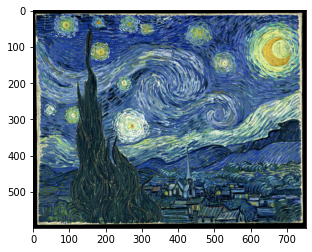

In [55]:
image = cv.imread("starry_night.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)

# Задание №1: повышение яркости

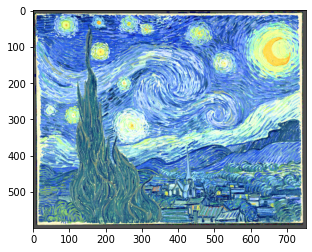

In [57]:
image_bright = image.copy()
image_bright = cv.cvtColor(image_bright, cv.COLOR_RGB2HSV)

value = 80

image_bright[:,:,2] = image_bright[:,:,2] + np.clip(value, 0, 255 - image_bright[:,:,2])
image_bright = cv.cvtColor(image_bright, cv.COLOR_HSV2RGB)

plt.imshow(image_bright)

# Задание №2: Восстановление размытого изображения

In [78]:
def show_labeled_images(images_labeled: dict):
    
    f, ax = plt.subplots(1,images_labeled.__len__())

    for i, (label, image) in enumerate(images_labeled.items()):
        ax[i].imshow(image)
        ax[i].set_title(label)

    f.set_size_inches(16,16)


In [88]:
image_blured = cv.GaussianBlur(image, (21, 21), 0)

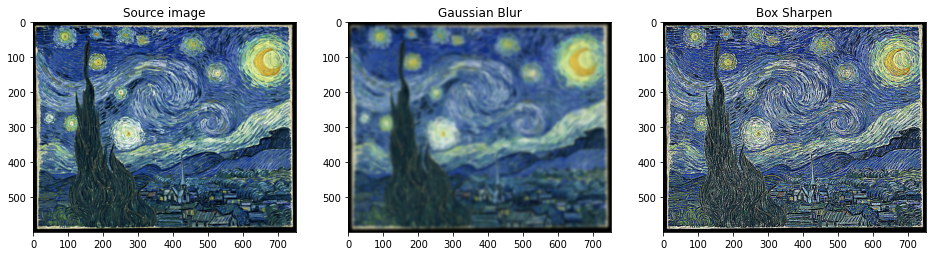

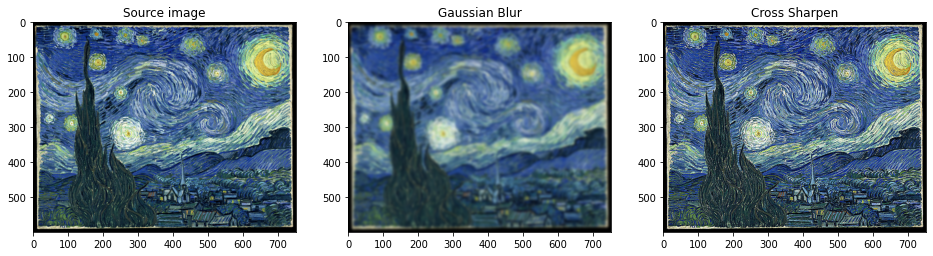

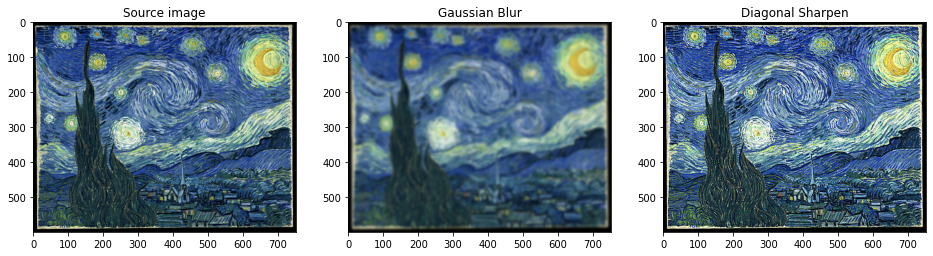

In [99]:
## BOX SHARPEN
kernel = np.array([[-1, -1, -1,], 
                   [-1, 9, -1,], 
                   [-1, -1, -1,]])

image_sharpen = cv.filter2D(image, -1, kernel)

show_labeled_images({"Source image": image, 
                     "Gaussian Blur": image_blured, 
                     "Box Sharpen": image_sharpen})


## CROSS SHARPEN
kernel = np.array([[0, -1, 0,], 
                   [-1, 5, -1,], 
                   [0, -1, 0,]])

image_sharpen = cv.filter2D(image, -1, kernel)

show_labeled_images({"Source image": image, 
                     "Gaussian Blur": image_blured, 
                     "Cross Sharpen": image_sharpen})


## DIAGONAL SHARPEN
kernel = np.array([[-0.7, 0, -0.7,], 
                   [0, 2.5, 0,], 
                   [-0.7, 0, 0.7,]])

image_sharpen = cv.filter2D(image, -1, kernel)

show_labeled_images({"Source image": image, 
                     "Gaussian Blur": image_blured, 
                     "Diagonal Sharpen": image_sharpen})
